In [62]:
import pandas as pnd
import matplotlib.pyplot as plot

In [63]:
dataframe = pnd.read_csv('pesos_y_alturas_v1.csv')
dataframe

,Altura,Peso
0,1.875714,109.721075
1,1.747060,73.622792
2,1.882397,96.497629
3,1.821967,99.809586
4,1.774998,93.598695
...,...,...
9995,1.680785,62.041210
9996,1.703506,77.504378
9997,1.622247,58.275424
9998,1.753470,74.322226


In [64]:
def hypothesis(x, theta0, theta1):
    return theta0 + (theta1 * x)

In [65]:
def lrPartialDerivatives(X, Y, m, theta0, theta1):
    deriv0 = 0
    deriv1 = 0
    
    for i in range(0, m):
        deriv0 += (hypothesis(X[i], theta0, theta1) - Y[i])
        deriv1 += (hypothesis(X[i], theta0, theta1) - Y[i]) * X[i]
    
    deriv0 /= m
    deriv1 /= m
    
    return deriv0, deriv1

In [66]:
def linearRegresion(X, Y, alpha, tol, maxIters):
    #Initial theta guess values
    theta0 = 0
    theta1 = 0
    m = len(X)
    band = True
    cont = 0
    
    while band:
        deriv0, deriv1 = lrPartialDerivatives(X, Y, m, theta0, theta1)
        chRate0 = alpha * deriv0
        chRate1 = alpha * deriv1
        
        theta0 += (-1 * chRate0)
        theta1 += (-1 * chRate1)
        cont += 1
        
        if (cont == maxIters) or (max(abs(chRate0), abs(chRate1)) < tol):
            band = False
    
    return theta0, theta1

In [67]:
def getPredictedValues(X, theta0, theta1):
    yValues = []
    
    for i in range(0, len(X)):
        prediction = theta0 + (theta1 * X[i])
        yValues.append(prediction)
    
    return yValues

In [68]:
X = dataframe['Altura']
Y = dataframe['Peso']
alpha = 0.25
tol = 1e-6
maxIters = 10

theta0, theta1 = linearRegresion(X, Y, alpha, tol, maxIters)
theta0, theta1

(18.038742543191482, 32.99975230637033)

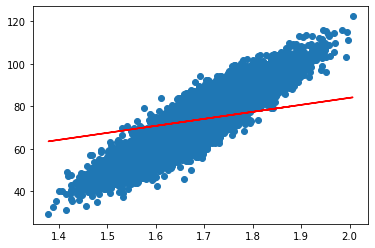

In [69]:
predictedPesos = getPredictedValues(X, theta0, theta1)

plot.scatter(X, Y)
plot.plot(X, predictedPesos, '-r')
plot.show()